In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_orig = pd.read_csv('hmda_2017_nationwide_all-records_labels.csv')

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
df_orig.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [46]:
df_orig['action_taken_name'].value_counts()

Loan originated                                        7339057
Loan purchased by the institution                      2086676
Application denied by financial institution            2009743
Application withdrawn by applicant                     1696289
File closed for incompleteness                          601148
Application approved but not accepted                   409797
Preapproval request denied by financial institution     106680
Preapproval request approved but not accepted            36106
Name: action_taken_name, dtype: int64

In [47]:
df_sub = df_orig[['applicant_race_name_1', 'applicant_ethnicity_name', 'action_taken_name', 'applicant_income_000s', 'tract_to_msamd_income', 'hoepa_status_name', 'loan_amount_000s']]
df_sub

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s
0,Black or African American,Not Hispanic or Latino,Application withdrawn by applicant,12.0,47.540001,Not a HOEPA loan,53.0
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0
2,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",File closed for incompleteness,50.0,63.939999,Not a HOEPA loan,103.0
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0
4,White,Not Hispanic or Latino,Application withdrawn by applicant,29.0,79.250000,Not a HOEPA loan,90.0
...,...,...,...,...,...,...,...
14285491,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated,167.0,138.639999,Not a HOEPA loan,832.0
14285492,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Application denied by financial institution,193.0,138.639999,Not a HOEPA loan,840.0
14285493,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated,175.0,138.639999,Not a HOEPA loan,476.0
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0


In [48]:
df_sub = df_sub[~df_sub['applicant_race_name_1'].str.contains('Information not provided')]
df_sub = df_sub[~df_sub['applicant_race_name_1'].str.contains('Not applicable')]
df_sub = df_sub[df_sub['hoepa_status_name'].str.contains('Not')]
df_sub = df_sub[~df_sub['action_taken_name'].str.contains('withdrawn')]
df_sub = df_sub[~df_sub['action_taken_name'].str.contains('incomplete')]

In [49]:
df_sub.head()

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0


In [50]:
approved = ['Application approved but not accepted', 'Loan originated', 'Loan purchased by the institution', 'Preapproval request approved but not accepted']
not_approved = ['Application denied by financial institution', 'Preapproval request denied by financial institution']

def filter_action(x):
    if x.strip() in approved:
        return 'Approved'
    elif x.strip() in not_approved:
        return 'Not approved'
    else: 
        None

In [51]:
df_sub['action'] = df_sub['action_taken_name'].apply(filter_action)

In [52]:
# exclude those who have hoepa loan since it is a rare and high cost loan
df_sub

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s,action
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0,Not approved
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0,Approved
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0,Not approved
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0,Approved
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0,Not approved
...,...,...,...,...,...,...,...,...
14285487,White,Not Hispanic or Latino,Application approved but not accepted,31.0,120.540001,Not a HOEPA loan,188.0,Approved
14285488,Asian,Not Hispanic or Latino,Application denied by financial institution,70.0,138.639999,Not a HOEPA loan,340.0,Not approved
14285489,White,Not Hispanic or Latino,Application denied by financial institution,84.0,208.770004,Not a HOEPA loan,324.0,Not approved
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0,Not approved


In [53]:
df_sub['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino                                                               8081609
Hispanic or Latino                                                                    983918
Information not provided by applicant in mail, Internet, or telephone application     152614
Not applicable                                                                          3342
Name: applicant_ethnicity_name, dtype: int64

In [54]:
combined = df_sub['applicant_race_name_1'] + ', ' + df_sub['applicant_ethnicity_name']
splitted = combined.str.split(',')
splitted

1                            [White,  Not Hispanic or Latino]
3                            [White,  Not Hispanic or Latino]
7                            [Asian,  Not Hispanic or Latino]
9                            [White,  Not Hispanic or Latino]
10          [Black or African American,  Not Hispanic or L...
                                  ...                        
14285487                     [White,  Not Hispanic or Latino]
14285488                     [Asian,  Not Hispanic or Latino]
14285489                     [White,  Not Hispanic or Latino]
14285494                     [White,  Not Hispanic or Latino]
14285495                     [White,  Not Hispanic or Latino]
Length: 9221483, dtype: object

In [55]:
a = splitted.apply(lambda x: 'Hispanic/Latino ' + x[0] if (x[0].strip() == 'White') & (x[1].strip() == 'Hispanic or Latino') else x[0])
a

1                               White
3                               White
7                               Asian
9                               White
10          Black or African American
                      ...            
14285487                        White
14285488                        Asian
14285489                        White
14285494                        White
14285495                        White
Length: 9221483, dtype: object

Text(0.5, 0, 'Proportion')

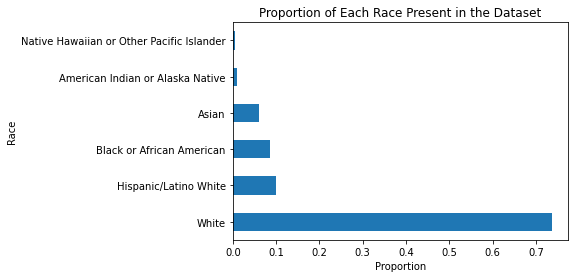

In [56]:
b = a.value_counts()
b = b / b.sum()
b.plot(kind='barh')
plt.title('Proportion of Each Race Present in the Dataset')
plt.ylabel('Race')
plt.xlabel('Proportion')

In [57]:
b / b.sum()

White                                        0.736609
Hispanic/Latino White                        0.100709
Black or African American                    0.086727
Asian                                        0.061523
American Indian or Alaska Native             0.009312
Native Hawaiian or Other Pacific Islander    0.005121
dtype: float64

<AxesSubplot:>

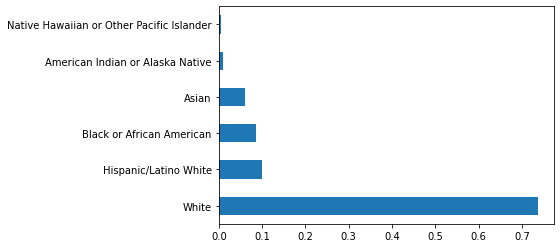

In [58]:
b.plot(kind='barh')

In [59]:
df = df_sub.assign(updated_race = a)

In [60]:
df

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s,action,updated_race
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0,Not approved,White
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0,Approved,White
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0,Not approved,Asian
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0,Approved,White
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0,Not approved,Black or African American
...,...,...,...,...,...,...,...,...,...
14285487,White,Not Hispanic or Latino,Application approved but not accepted,31.0,120.540001,Not a HOEPA loan,188.0,Approved,White
14285488,Asian,Not Hispanic or Latino,Application denied by financial institution,70.0,138.639999,Not a HOEPA loan,340.0,Not approved,Asian
14285489,White,Not Hispanic or Latino,Application denied by financial institution,84.0,208.770004,Not a HOEPA loan,324.0,Not approved,White
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0,Not approved,White


In [61]:
dff = df[['updated_race', 'action', 'tract_to_msamd_income', 'loan_amount_000s', 'applicant_income_000s']]

In [62]:
dff

,updated_race,action,tract_to_msamd_income,loan_amount_000s,applicant_income_000s
1,White,Not approved,86.239998,168.0,60.0
3,White,Approved,74.290001,88.0,53.0
7,Asian,Not approved,116.010002,185.0,51.0
9,White,Approved,71.129997,94.0,31.0
10,Black or African American,Not approved,100.750000,95.0,26.0
...,...,...,...,...,...
14285487,White,Approved,120.540001,188.0,31.0
14285488,Asian,Not approved,138.639999,340.0,70.0
14285489,White,Not approved,208.770004,324.0,84.0
14285494,White,Not approved,88.519997,141.0,55.0


In [63]:
uniq_race = dff.updated_race.unique()

In [64]:
def label_flipping(df, sort_by, sensitive, prom, demo, swap):
    promotion = df[df[sensitive] == prom].sort_values(sort_by, ascending=False)
    demotion = df[df[sensitive] == demo].sort_values(sort_by, ascending=True)
    num_p = 0
    num_d = 0
    
    p_prop = promotion[promotion[swap] == 1].shape[0] / len(promotion)
    d_prop = demotion[demotion[swap] == 1].shape[0] / len(demotion)
    reverse = np.abs(d_prop - p_prop) * (1/2)
    num_reverse = np.floor(reverse * len(df))

    if num_reverse % 2 == 1:
        num = num_reverse // 2
        num_d = int(num)
        num_p = int(num + 1)
    else:
        num = num_reverse // 2
        num_p = int(num)
        num_d = int(num)

    p1 = promotion[promotion[swap] == 1]
    p0s = promotion[promotion[swap] == 0].iloc[:num_p]
    p0 = promotion[promotion[swap] == 0].iloc[num_p:]
    d1s = demotion[demotion[swap] == 1].iloc[:num_d]
    d1 = demotion[demotion[swap] == 1].iloc[num_d:]
    d0 = demotion[demotion[swap] == 0]

    p0s[swap] = 1
    d1s[swap] = 0

    out_df = pd.concat([d1s,d1,d0,p0s,p1,p0], axis = 0)

    return out_df

In [65]:
dff['action'] = dff['action'].apply(lambda x: 1 if x == 'Approved' else 0)
dff

/var/folders/jm/y1xn0yjj22v8l8rwlryfjdj00000gn/T/ipykernel_29255/1076846241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['action'] = dff['action'].apply(lambda x: 1 if x == 'Approved' else 0)


,updated_race,action,tract_to_msamd_income,loan_amount_000s,applicant_income_000s
1,White,0,86.239998,168.0,60.0
3,White,1,74.290001,88.0,53.0
7,Asian,0,116.010002,185.0,51.0
9,White,1,71.129997,94.0,31.0
10,Black or African American,0,100.750000,95.0,26.0
...,...,...,...,...,...
14285487,White,1,120.540001,188.0,31.0
14285488,Asian,0,138.639999,340.0,70.0
14285489,White,0,208.770004,324.0,84.0
14285494,White,0,88.519997,141.0,55.0


In [44]:
# dff['class'] = dff['updated_race'].apply(lambda x: 'Majority' if (x == 'White' or x == 'Asian') else 'Minority')

In [28]:
df_flipped = label_flipping(dff, 'applicant_income_000s', 'class', 'Minority', 'Majority', 'action')
df_flipped

,updated_race,action,tract_to_msamd_income,loan_amount_000s,applicant_income_000s,class
10396186,White,0,135.220001,144.0,1.0,Majority
13508306,White,0,87.580002,162.0,1.0,Majority
7251589,White,0,62.200001,5.0,1.0,Majority
8985713,White,0,194.470001,72.0,1.0,Majority
1021339,White,0,91.089996,140.0,1.0,Majority
...,...,...,...,...,...,...
14282702,Hispanic/Latino White,0,157.690002,6.0,NaN,Minority
14283179,Black or African American,0,81.190002,247.0,NaN,Minority
14284152,Black or African American,0,162.380005,8.0,NaN,Minority
14284973,Black or African American,0,105.349998,121.0,NaN,Minority


In [29]:
maj = df_flipped[df_flipped['class'] == 'Majority']
maj['action'].value_counts() / maj.shape[0]

1    0.796907
0    0.203093
Name: action, dtype: float64

In [30]:
mino = df_flipped[df_flipped['class'] == 'Minority']
mino['action'].value_counts() / mino.shape[0]

1    0.858844
0    0.141156
Name: action, dtype: float64

In [31]:
df_flipped['class'] = df_flipped['class'].apply(lambda x: 1 if x == 'Majority' else 0)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
dfc_all = dff.copy()

In [67]:
num_cols = ['loan_amount_000s', 'applicant_income_000s', 'tract_to_msamd_income']

scaler = preprocessing.StandardScaler()
dfc_all[num_cols] = scaler.fit_transform(dff[num_cols])


In [68]:
dfc_all

,updated_race,action,tract_to_msamd_income,loan_amount_000s,applicant_income_000s
1,White,0,-0.675534,-0.124186,-0.068124
3,White,1,-0.969587,-0.289632,-0.077294
7,Asian,0,0.057013,-0.089029,-0.079914
9,White,1,-1.047345,-0.277224,-0.106115
10,Black or African American,0,-0.318488,-0.275156,-0.112665
...,...,...,...,...,...
14285487,White,1,0.168483,-0.082825,-0.106115
14285488,Asian,0,0.613868,0.231523,-0.055024
14285489,White,0,2.339550,0.198433,-0.036683
14285494,White,0,-0.619431,-0.180024,-0.074674


In [35]:
uniq_race

array(['White', 'Asian', 'Black or African American',
       'Hispanic/Latino White', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [167]:
#dfc_min = dfc_all[dfc_all['updated_race'] != 'White'].drop('updated_race', axis=1)
dfc_w = dfc_all[dfc_all['updated_race'] == 'American Indian or Alaska Native'].drop('updated_race', axis=1)
dfc_w = dfc_all.drop('updated_race', axis=1)

In [168]:
# cat_cols = ['applicant_ethnicity_name']

# encoder = preprocessing.OneHotEncoder(sparse=False)

# df_onehot = pd.DataFrame(encoder.fit_transform(dfc_w[cat_cols]))
# df_onehot.columns = encoder.get_feature_names(cat_cols)

# dfc_w = dfc_w.drop(cat_cols, axis = 1).reset_index(drop = True)
# dfc_w = pd.concat([df_onehot, dfc_w], axis = 1)

# dfc_w['action'] = dfc_w['action'].apply(lambda x: 1 if x == 'Approved' else 0)
dfc1 = dfc_w.dropna().reset_index(drop=True)

In [169]:
# cat_cols = ['applicant_ethnicity_name']

# encoder = preprocessing.OneHotEncoder(sparse=False)

# df_onehot = pd.DataFrame(encoder.fit_transform(dfc_min[cat_cols]))
# df_onehot.columns = encoder.get_feature_names(cat_cols)

# dfc_min = dfc_min.drop(cat_cols, axis = 1).reset_index(drop = True)
# dfc_min = pd.concat([df_onehot, dfc_min], axis = 1)

# dfc_min['action'] = dfc_min['action'].apply(lambda x: 1 if x == 'Approved' else 0)
# dfc2 = dfc_min.dropna().reset_index(drop=True)

In [170]:
dfc1

,action,tract_to_msamd_income,loan_amount_000s,applicant_income_000s
0,0,-0.675534,-0.124186,-0.068124
1,1,-0.969587,-0.289632,-0.077294
2,0,0.057013,-0.089029,-0.079914
3,1,-1.047345,-0.277224,-0.106115
4,0,-0.318488,-0.275156,-0.112665
...,...,...,...,...
8681497,1,0.168483,-0.082825,-0.106115
8681498,0,0.613868,0.231523,-0.055024
8681499,0,2.339550,0.198433,-0.036683
8681500,0,-0.619431,-0.180024,-0.074674


In [171]:
# dfc2

In [172]:
feature_w = dfc1.drop('action', axis = 1)

target_w = dfc1['action']

# feature_m = dfc2.drop('action', axis = 1)

# target_m = dfc2['action']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_w , target_w, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (6945201, 3)
Shape of testing feature: (1736301, 3)
Shape of training label: (6945201,)
Shape of training label: (1736301,)


In [173]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    probs = model.predict_proba(x_test)
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm, 'preds': y_pred, 'test': x_test, 'prob':probs}

In [174]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7357370640228854
Precision: 0.8426058584861363
Recall: 0.8341240401272889
F1 Score: 0.8383434964648648
Cohens Kappa Score: 0.1149940259837241
Area Under Curve: 0.5587597471460861
Confusion Matrix:
 [[  87699  222241]
 [ 236599 1189762]]


In [175]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [176]:
def contraction(model, x_test, y_test, sort_by, rate):
    pred = model['preds']
    datao = model['test']
    datao['class'] = pred
    data = datao.copy(deep=True)
    #data.sort_values(by=sort_by, axis=0, ascending=False, inplace=True)
    data1 = data[data['class'] == 1].sort_values(by=sort_by, axis=0,ascending=False)
    data0 = data[data['class'] == 0]
    dfp = pd.concat([data1,data0]).reset_index(drop=True)

    dataa = x_test.copy(deep=True)
    dataa['class'] = y_test
    data11 = dataa[dataa['class'] == 1].sort_values(by=sort_by, axis=0,ascending=False)
    data01 = dataa[dataa['class'] == 0]
    dfo = pd.concat([data11,data01]).reset_index(drop=True)

    
    arp = np.count_nonzero(dfp['class'] == 1) / dfp.shape[0]
    aro = np.count_nonzero(dfo['class'] == 1) / dfo.shape[0]
    print(arp, aro)
    idx = 0

    while round(aro,5) != round(arp,5):
        if round(arp, 5) > round(aro, 5):
            dfp = dfp.iloc[1: , :]
            arp = np.count_nonzero(dfp['class'] == 1) / dfp.shape[0]
            idx += 1

        if round(arp, 5) < round(aro, 5):
            dfo = dfo.iloc[1: , :]
            aro = np.count_nonzero(dfo['class'] == 1) / dfo.shape[0]
            idx += 1

    fr = 1 - np.count_nonzero(dfp['class'].loc[idx:] == dfo['class'].loc[idx:]) / dfo['class'].loc[idx:].shape[0]

    return arp, aro, fr

In [177]:
a = contraction(dtc_eval, X_test, y_test, 'applicant_income_000s', .2)
a

/var/folders/jm/y1xn0yjj22v8l8rwlryfjdj00000gn/T/ipykernel_29255/561323329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datao['class'] = pred


0.8132247807263833 0.8214940842630396


(0.8132247807263833, 0.8132249104963213, 0.00865237379845718)

/var/folders/jm/y1xn0yjj22v8l8rwlryfjdj00000gn/T/ipykernel_29255/3787421050.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


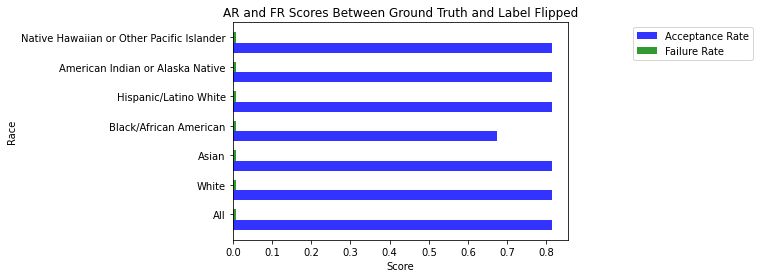

In [178]:
ar_fr_dict = {'All': (0.8132249104963213, 0.00865237379845718),
'White': (0.8132247807263833, 0.00865237379845718),
'Asian': (0.8132247807263833, 0.00865237379845718),
'Black/African American': (0.6736141651106289, 0.007533866351373764),
'Hispanic/Latino White': (0.8132249104963213, 0.00865237379845718),
'American Indian or Alaska Native': (0.8132249104963213, 0.00865237379845718),
'Native Hawaiian or Other Pacific Islander': (0.8132249104963213, 0.00865237379845718)
}
ar = [x[0] for x in ar_fr_dict.values()]
fr = [x[1] for x in ar_fr_dict.values()]

n_groups = 7
means_frank = ar
means_guido = fr

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, ar, bar_width,
alpha=opacity,
color='b',
label='Acceptance Rate')

rects2 = plt.barh(index + bar_width, fr, bar_width,
alpha=opacity,
color='g',
label='Failure Rate')

plt.xlabel('Score')
plt.ylabel('Race')
plt.title('AR and FR Scores Between Ground Truth and Non-Label Flipped')
plt.yticks(index + bar_width, ar_fr_dict.keys())
# plt.legend()

leg = ax.legend(('Acceptance Rate','Failure Rate'), bbox_to_anchor=(1.18, 1), bbox_transform=ax.transAxes)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Race')

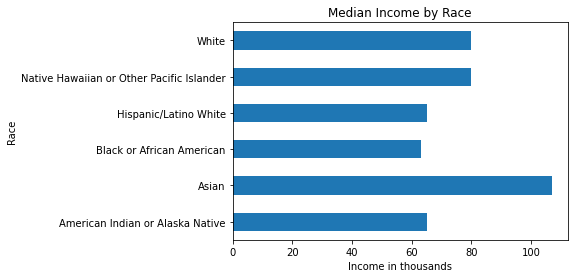

In [185]:
dff.groupby('updated_race')['applicant_income_000s'].median().plot(kind='barh')
plt.title('Median Income by Race')
plt.xlabel('Income in thousands')
plt.ylabel('Race')